In [32]:
using Revise

using ramnet
using ramnet.Encoders
using ramnet.Utils: accuracy

using StatsBase: msd

using Random
using StatsPlots
pyplot()

Plots.PyPlotBackend()

# Regression with Weightless Neural Networks

## Linear data

In [2]:
function line_dataset(N; seed=nothing)
    rng = isnothing(seed) ? MersenneTwister() : MersenneTwister(seed) 
    intercepts = rand(rng, 2)
    a, b = -intercepts[2]/intercepts[1], intercepts[2]

    X = rand(rng, Float64, N)
    y = a*X .+ b

    return X, y
end

line_dataset (generic function with 1 method)

Mean squared deviation: 0.05831663827207077


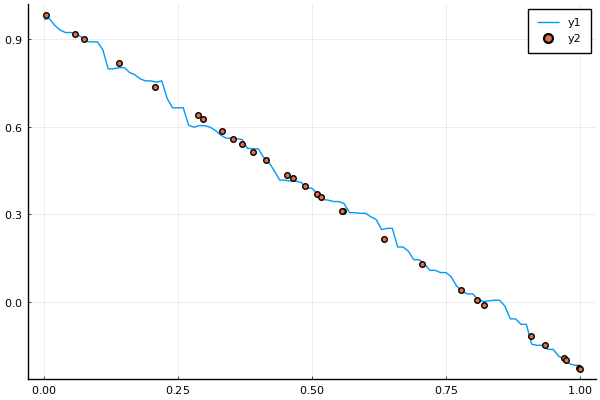

In [72]:
X, y = line_dataset(30; seed=3)

thermo = Thermometer(0.0, 1.0, 80)
X_encoded = permutedims(encode(thermo, X; flat=false))

model = RegressionDiscriminator(80, 20; seed=1)

train!(model, X_encoded, y)

# Testing
X_test, y_test = line_dataset(4000; seed=32)
y_pred = predict(model, permutedims(encode(thermo, X_test; flat=false)))
println("Mean squared deviation: $(msd(y_pred, y_test))")

plot((x) -> predict(model, encode(thermo, x)), 0:0.01:1)
scatter!(X, y)

## Non-linear data

In [73]:
function wiggly_dataset(N; seed=nothing)
    rng = isnothing(seed) ? MersenneTwister() : MersenneTwister(seed)
    wiggly(x) = sin(10*π*(x + 1)^(-3))
    
    X = rand(rng, Float64, N)
    
    return X, wiggly.(X)
end

wiggly_dataset (generic function with 1 method)

Mean squared deviation: 0.02275098763927742


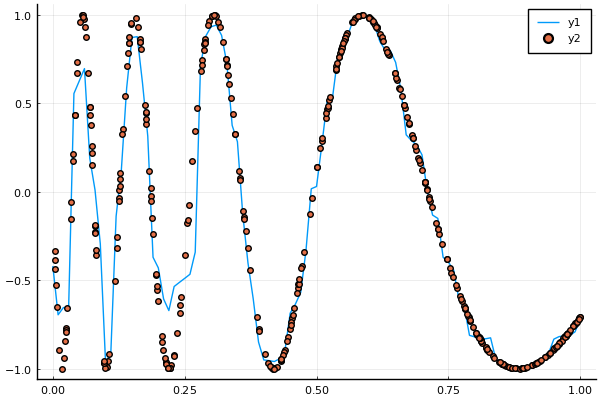

In [90]:
X, y = wiggly_dataset(400; seed=3)

thermo = Thermometer(0.0, 1.0, 160)
X_encoded = permutedims(encode(thermo, X; flat=false))

model = RegressionDiscriminator(160, 80; seed=1)

train!(model, X_encoded, y)

# Testing
X_test, y_test = wiggly_dataset(4000; seed=32)
y_pred = predict(model, permutedims(encode(thermo, X_test; flat=false)))
println("Mean squared deviation: $(msd(y_pred, y_test))")

plot((x) -> predict(model, encode(thermo, x)), 0:0.01:1)
scatter!(X, y)